In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df=pd.read_csv('glass.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Assigning respective header names
header=['Id','RI','Na','Mg',"Ai",'Si','K','Ca','Ba','Fe','Type of glass']
df.columns=header
df

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
print("There are",df.shape[0],"rows in the dataset")
print("There are",df.shape[1],"columns in the dataset")

There are 214 rows in the dataset
There are 11 columns in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Ai             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Here we can see there are no null values in the dataset and the data type is float and int which means there is no need of encoding the data.

In [6]:
#checking null values in the dataset
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Ai               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

# Description

In [7]:
df.describe()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Here we can see:
    i) There are little outliers present in the dataset.
    ii)Data is almost normally distributed.

# Visualization

# Uni-Variate Analysis

In [8]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Ai', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


<AxesSubplot:xlabel='Type of glass', ylabel='count'>

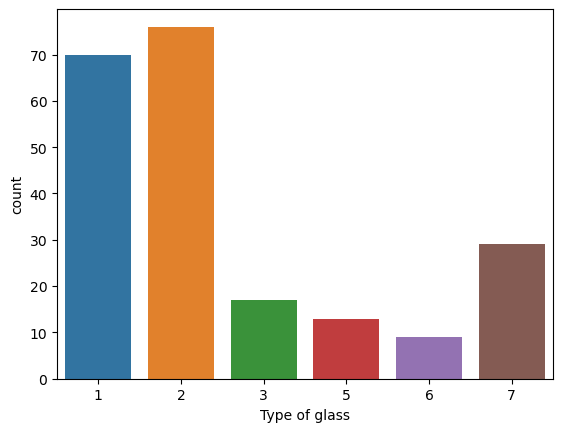

In [9]:
print(df['Type of glass'].value_counts())
sns.countplot(df['Type of glass'].sort_values())

<AxesSubplot:xlabel='RI', ylabel='Density'>

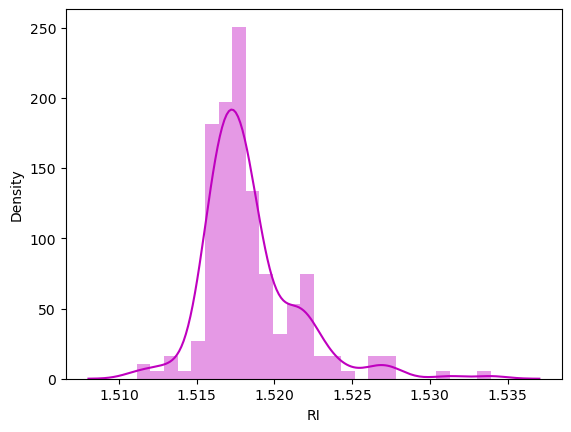

In [10]:
sns.distplot(df['RI'],color='m')

<AxesSubplot:xlabel='Na', ylabel='Count'>

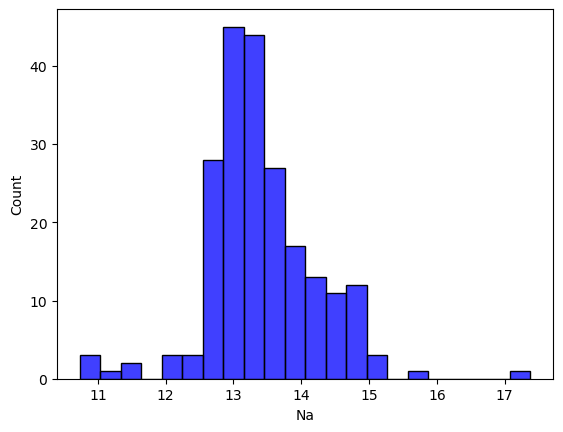

In [11]:
sns.histplot(df['Na'],color='blue')

<AxesSubplot:xlabel='Mg', ylabel='Count'>

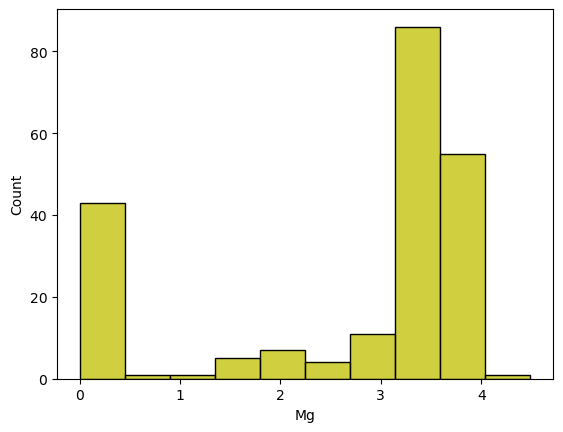

In [12]:
sns.histplot(df['Mg'],color='y')

<AxesSubplot:xlabel='Ai', ylabel='Density'>

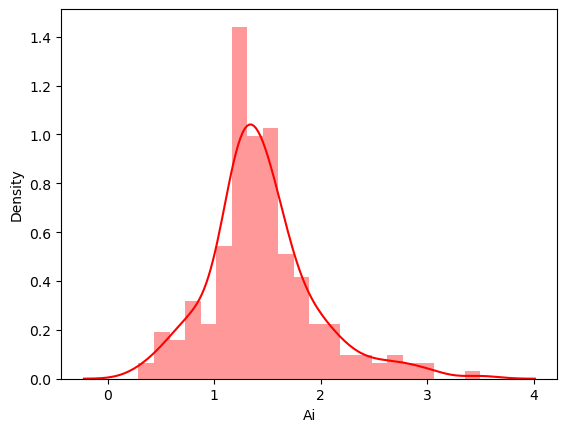

In [13]:
sns.distplot(df['Ai'],color='red')

<AxesSubplot:xlabel='Si', ylabel='Count'>

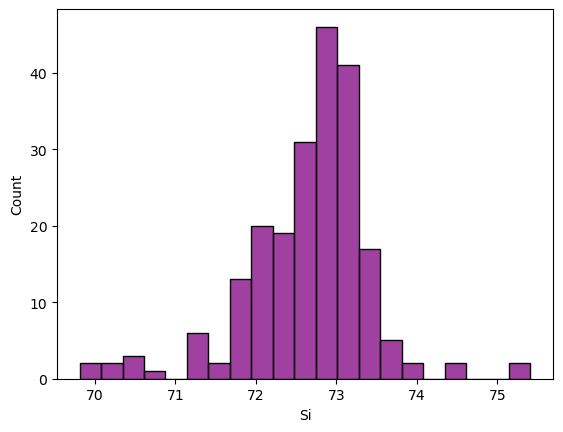

In [14]:
sns.histplot(df['Si'],color='purple')

<AxesSubplot:xlabel='K', ylabel='Density'>

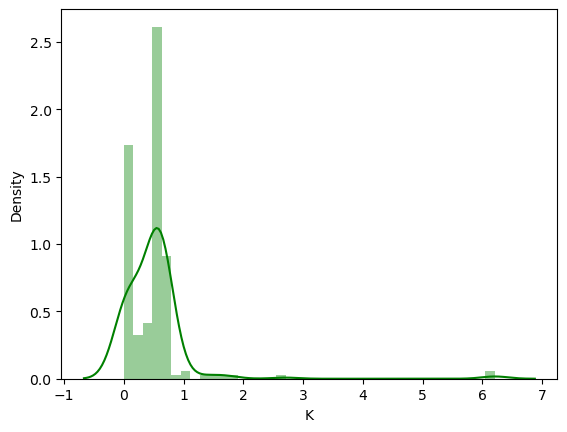

In [15]:
sns.distplot(df['K'],color='green')

<AxesSubplot:xlabel='Ca', ylabel='Density'>

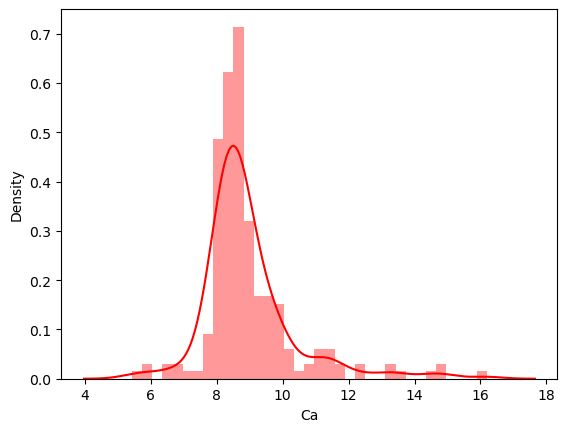

In [16]:
sns.distplot(df['Ca'],color='red')

<AxesSubplot:xlabel='Ba', ylabel='Count'>

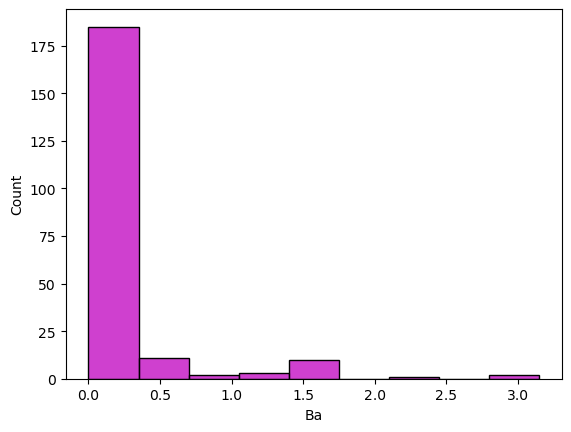

In [17]:
sns.histplot(df['Ba'],color='m')

<AxesSubplot:xlabel='Fe', ylabel='Density'>

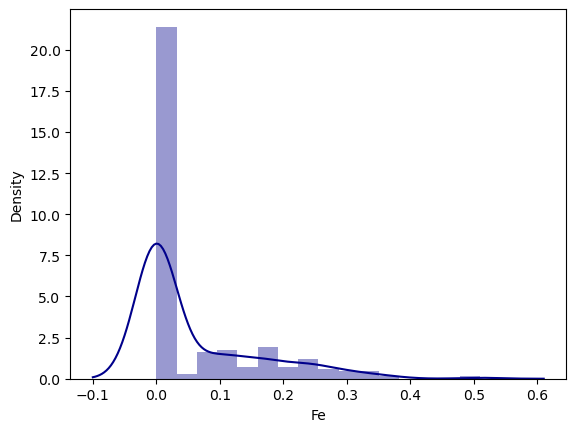

In [18]:
sns.distplot(df['Fe'],color='darkblue')

# Bi-Variate Analysis

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

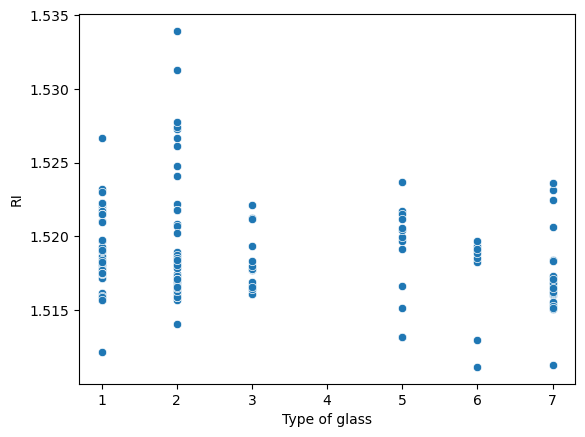

In [19]:
sns.scatterplot(data=df,y='RI',x='Type of glass')

<AxesSubplot:xlabel='Na', ylabel='Mg'>

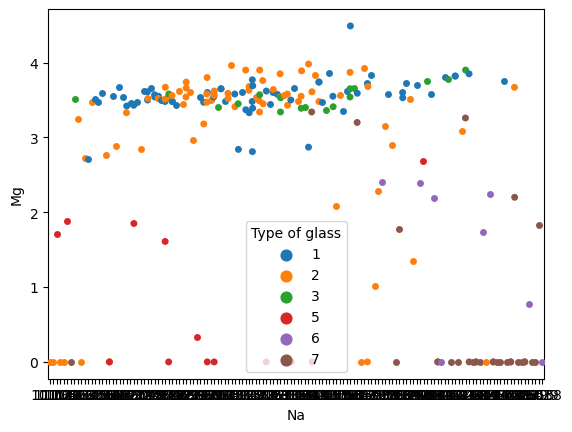

In [20]:
sns.stripplot(x='Na',y='Mg',hue='Type of glass',data=df)

<AxesSubplot:xlabel='Ai', ylabel='Si'>

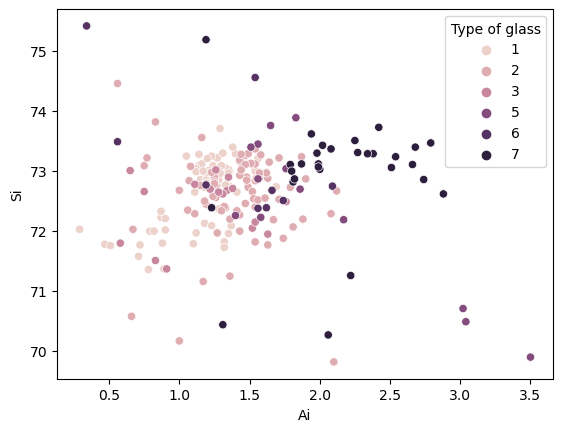

In [21]:
sns.scatterplot(data=df,x='Ai',y='Si',hue='Type of glass')

<AxesSubplot:xlabel='K', ylabel='Ca'>

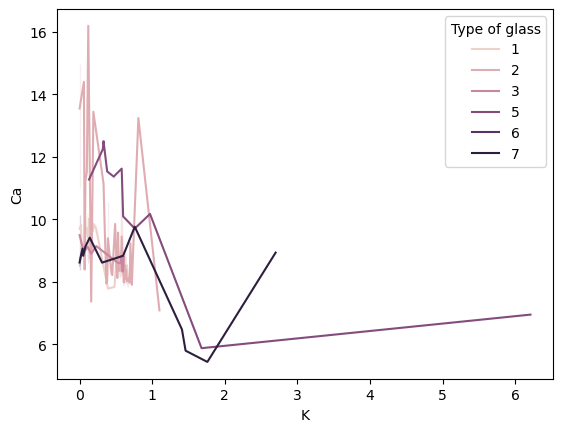

In [22]:
sns.lineplot(data=df,x='K',y='Ca',hue='Type of glass')

<AxesSubplot:xlabel='Ba', ylabel='Fe'>

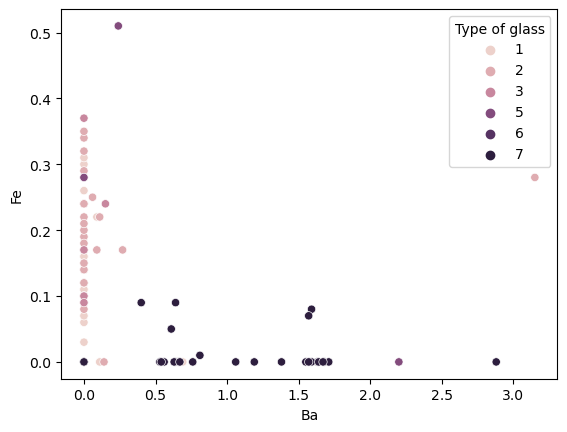

In [23]:
sns.scatterplot(data=df,x='Ba',y='Fe',hue='Type of glass')

# Multi-Variate Analysis

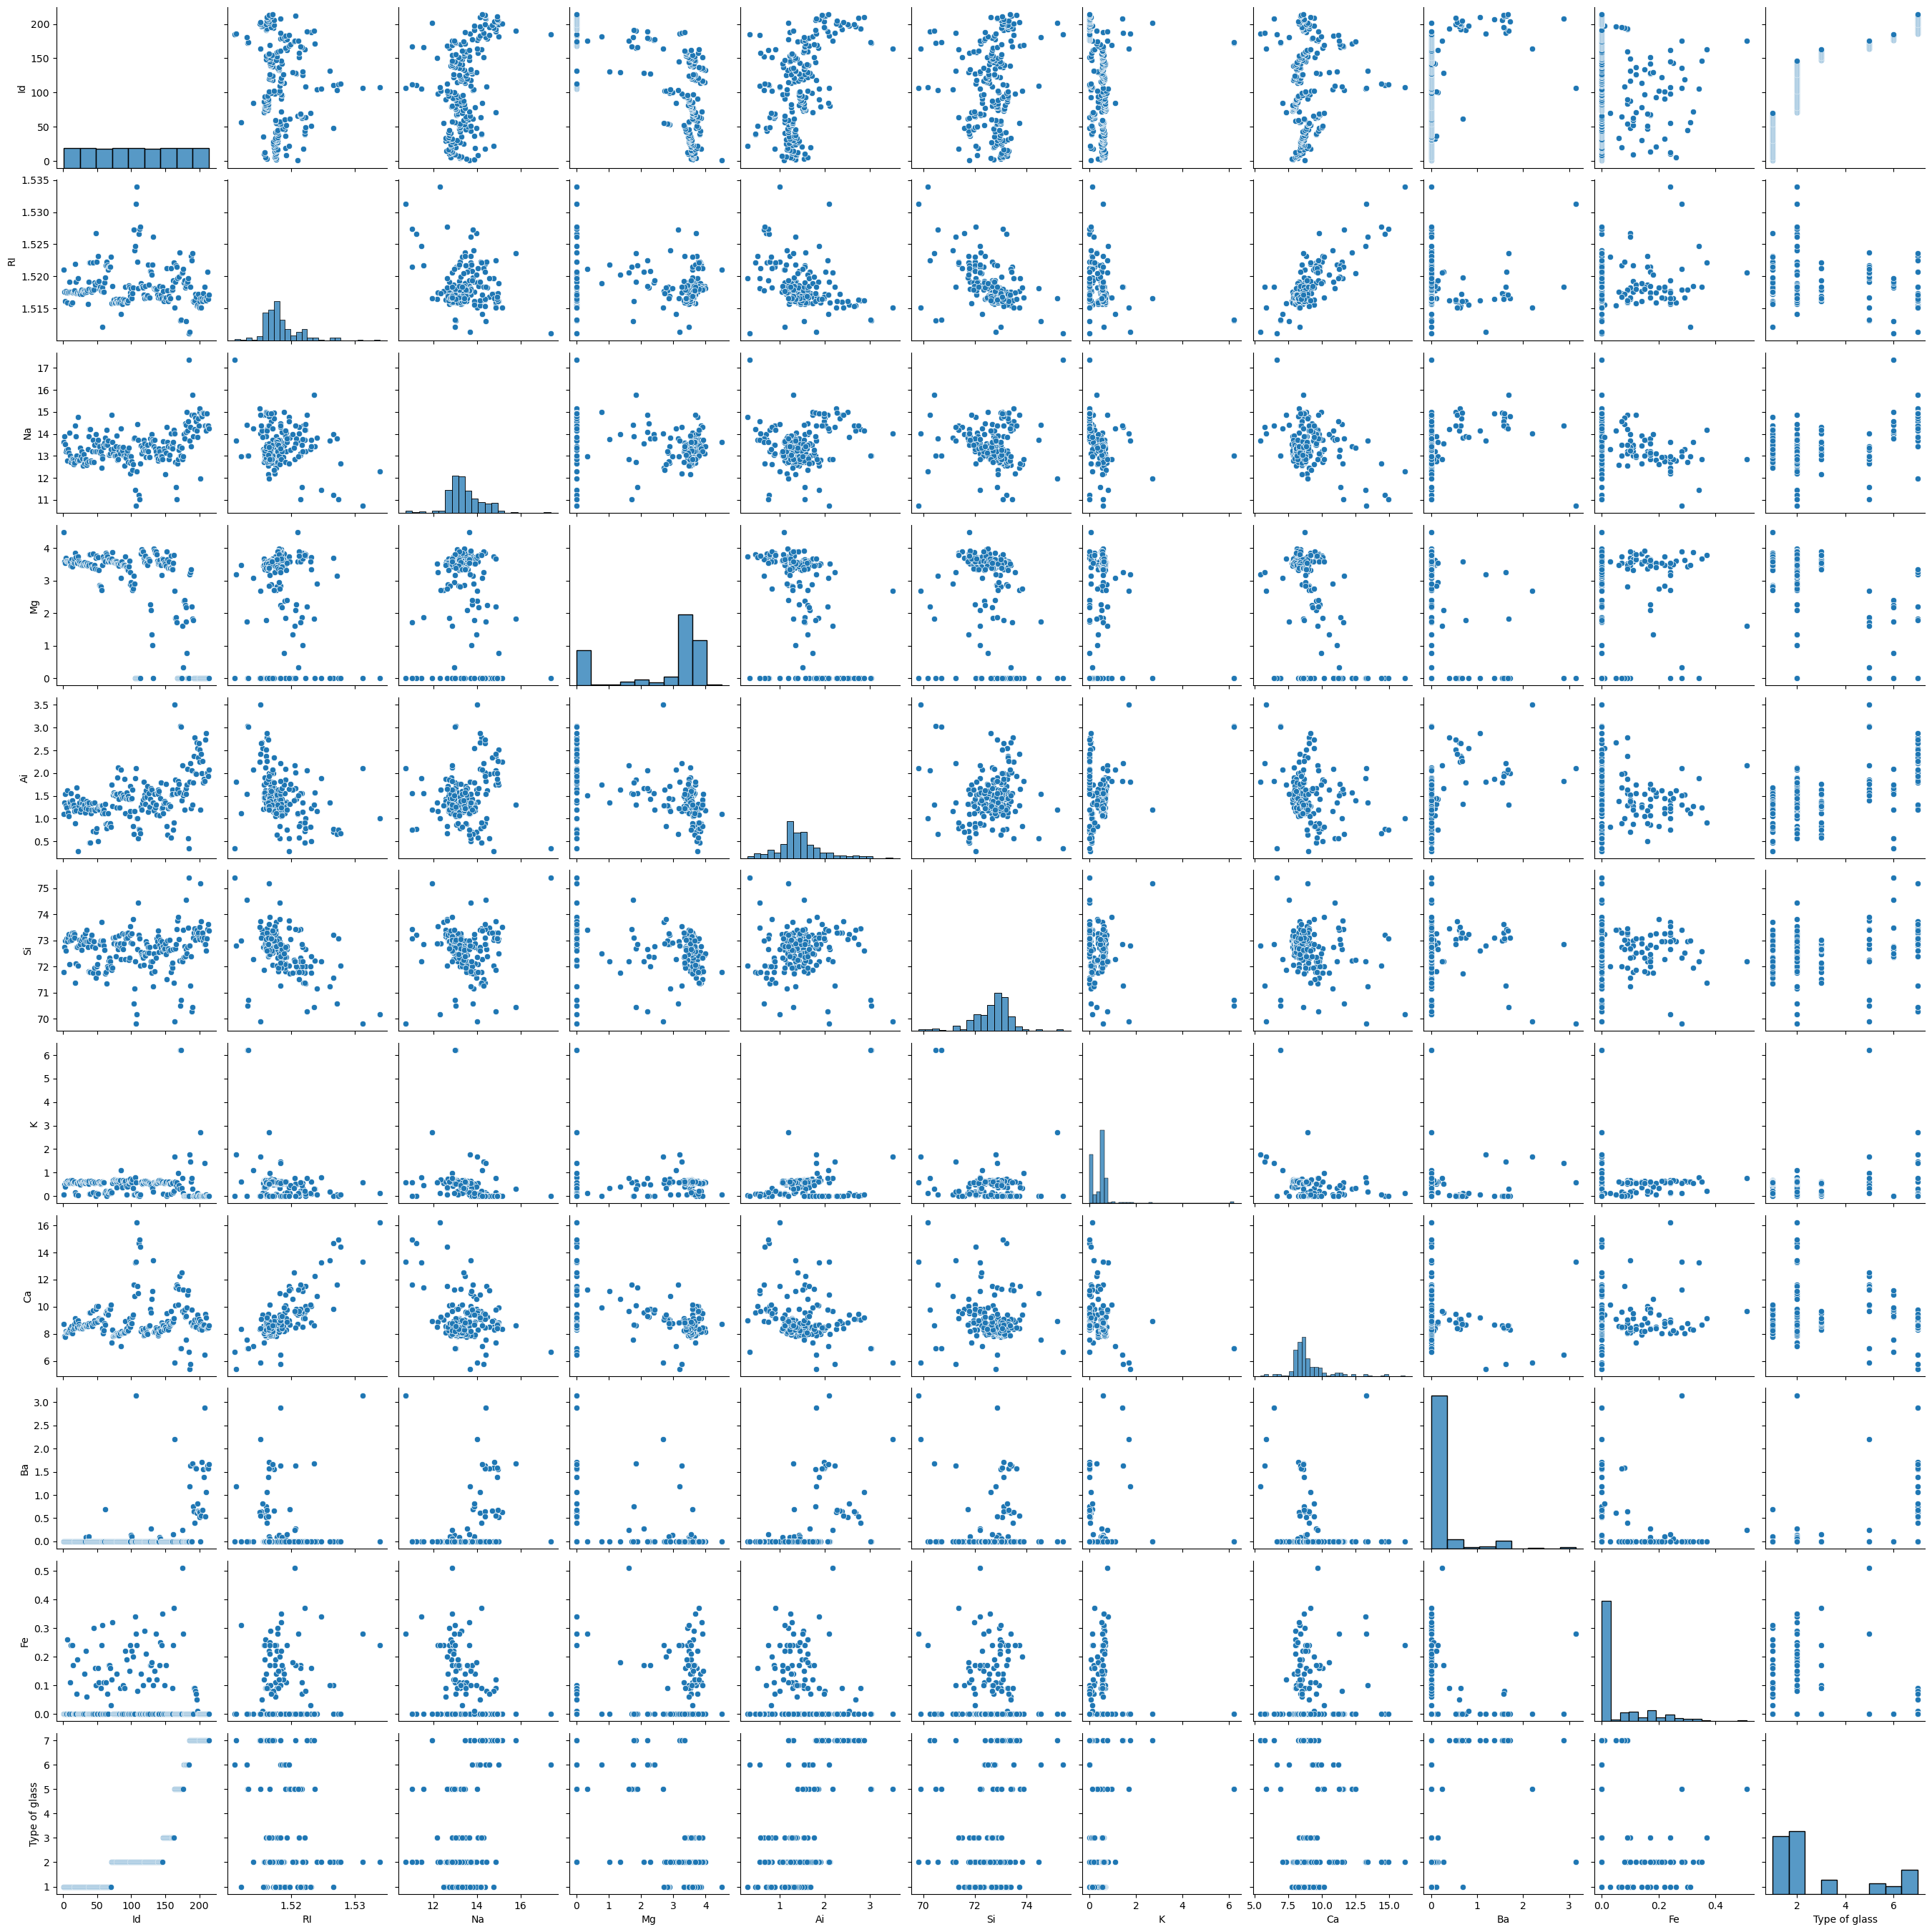

In [24]:
sns.pairplot(data=df,palette='Dark2')

# EDA

# Outliers Detection

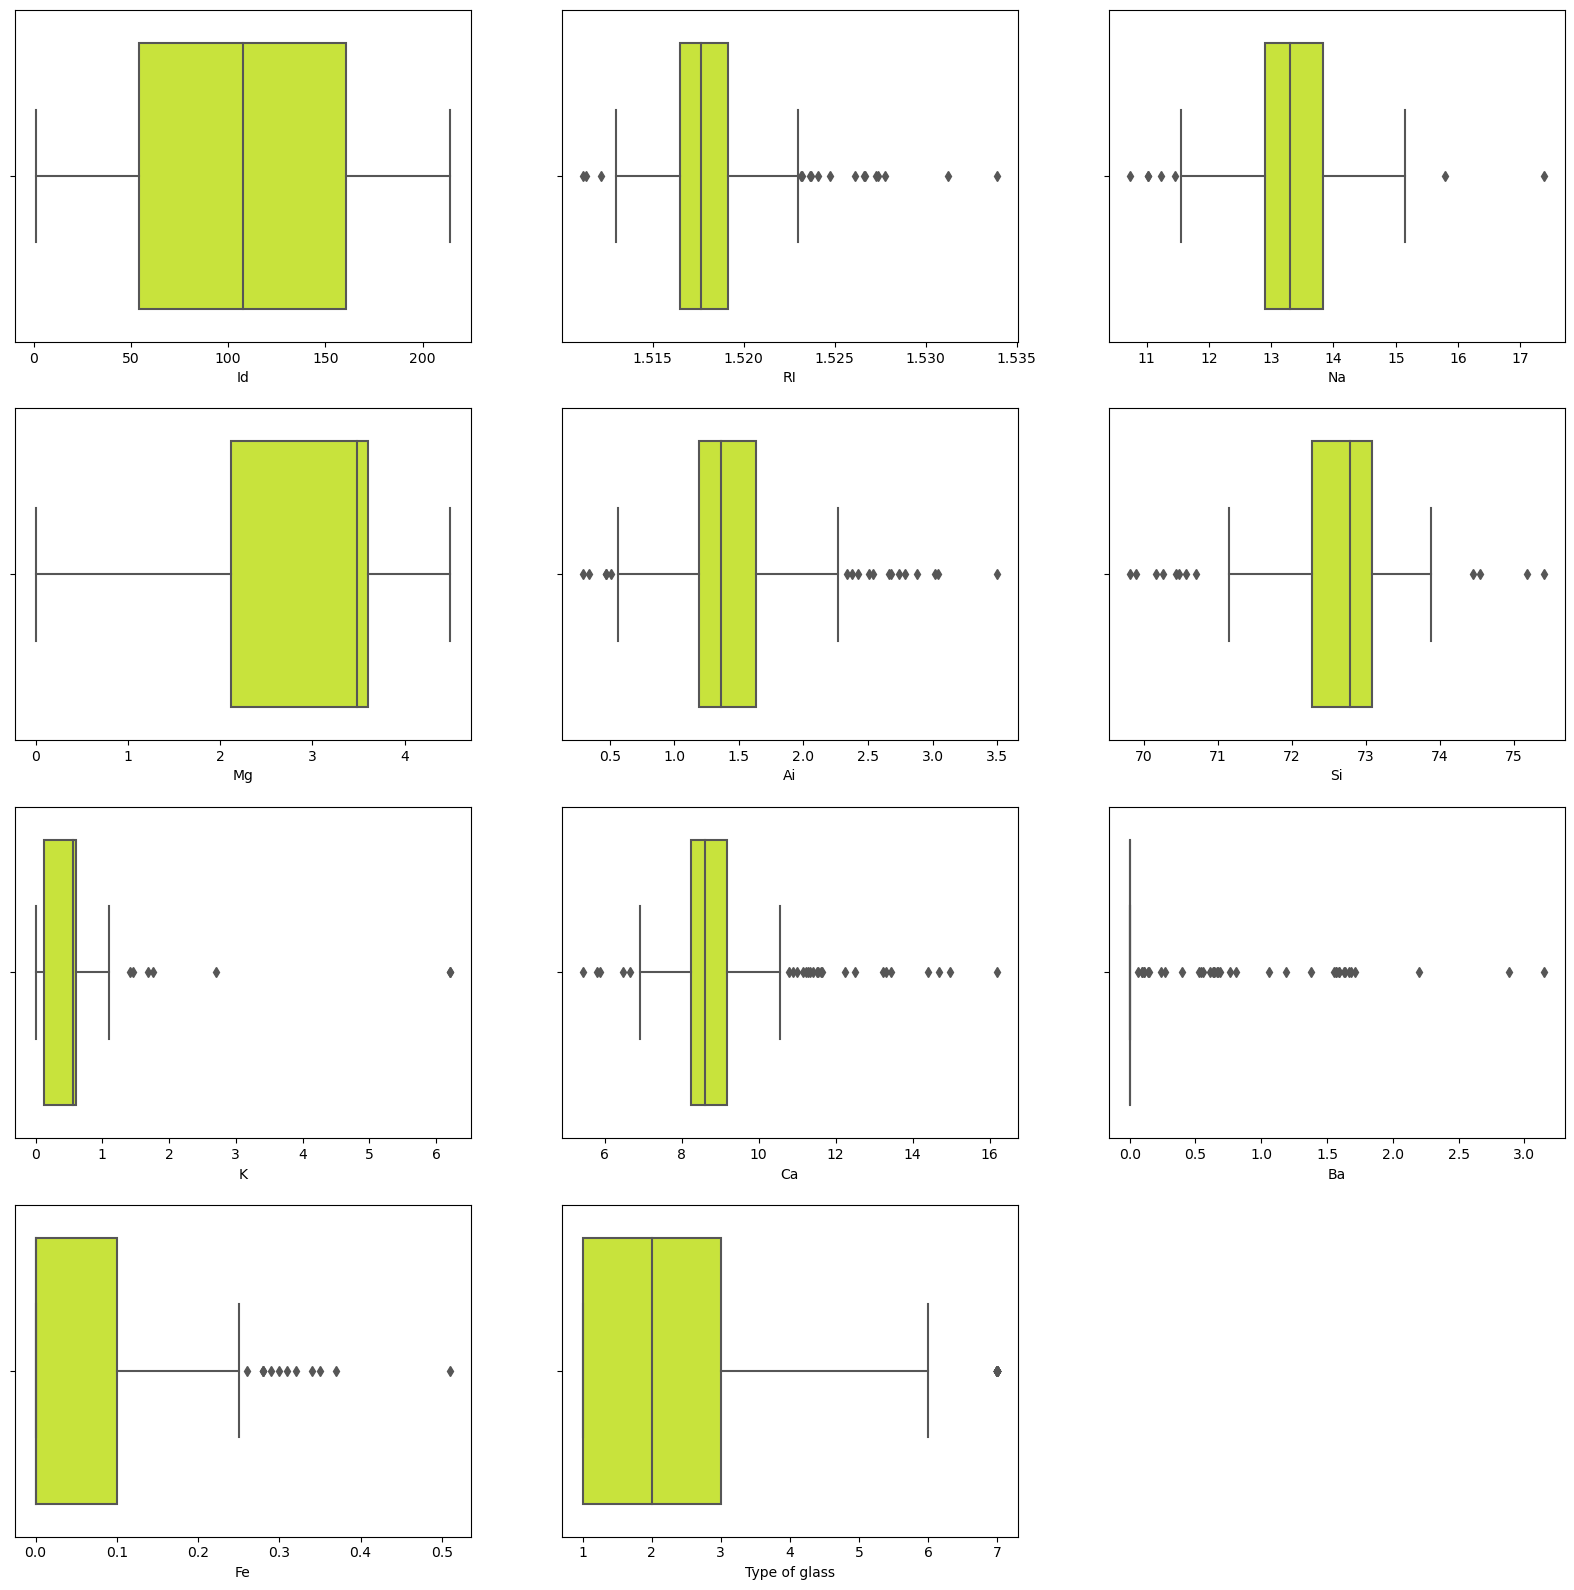

In [25]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(5,3,p)
        sns.boxplot(df[i],palette='gist_ncar')
        plt.xlabel(i)
    p+=1
plt.show()

In [26]:
#Removing outliers..
from scipy.stats import zscore
outliers=df[['RI','Na','Ai','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(outliers))
z

,RI,Na,Ai,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [27]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
       4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [29]:
print("Old Data Frame =",df.shape[0])
print("New Data Frame =",df_new.shape[0])
print("Data Loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Old Data Frame = 214
New Data Frame = 194
Data Loss = 9.345794392523365


As the data loss is below 10% we can continue with the new dataset.

In [30]:
df=df_new
df

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


# Skewness 

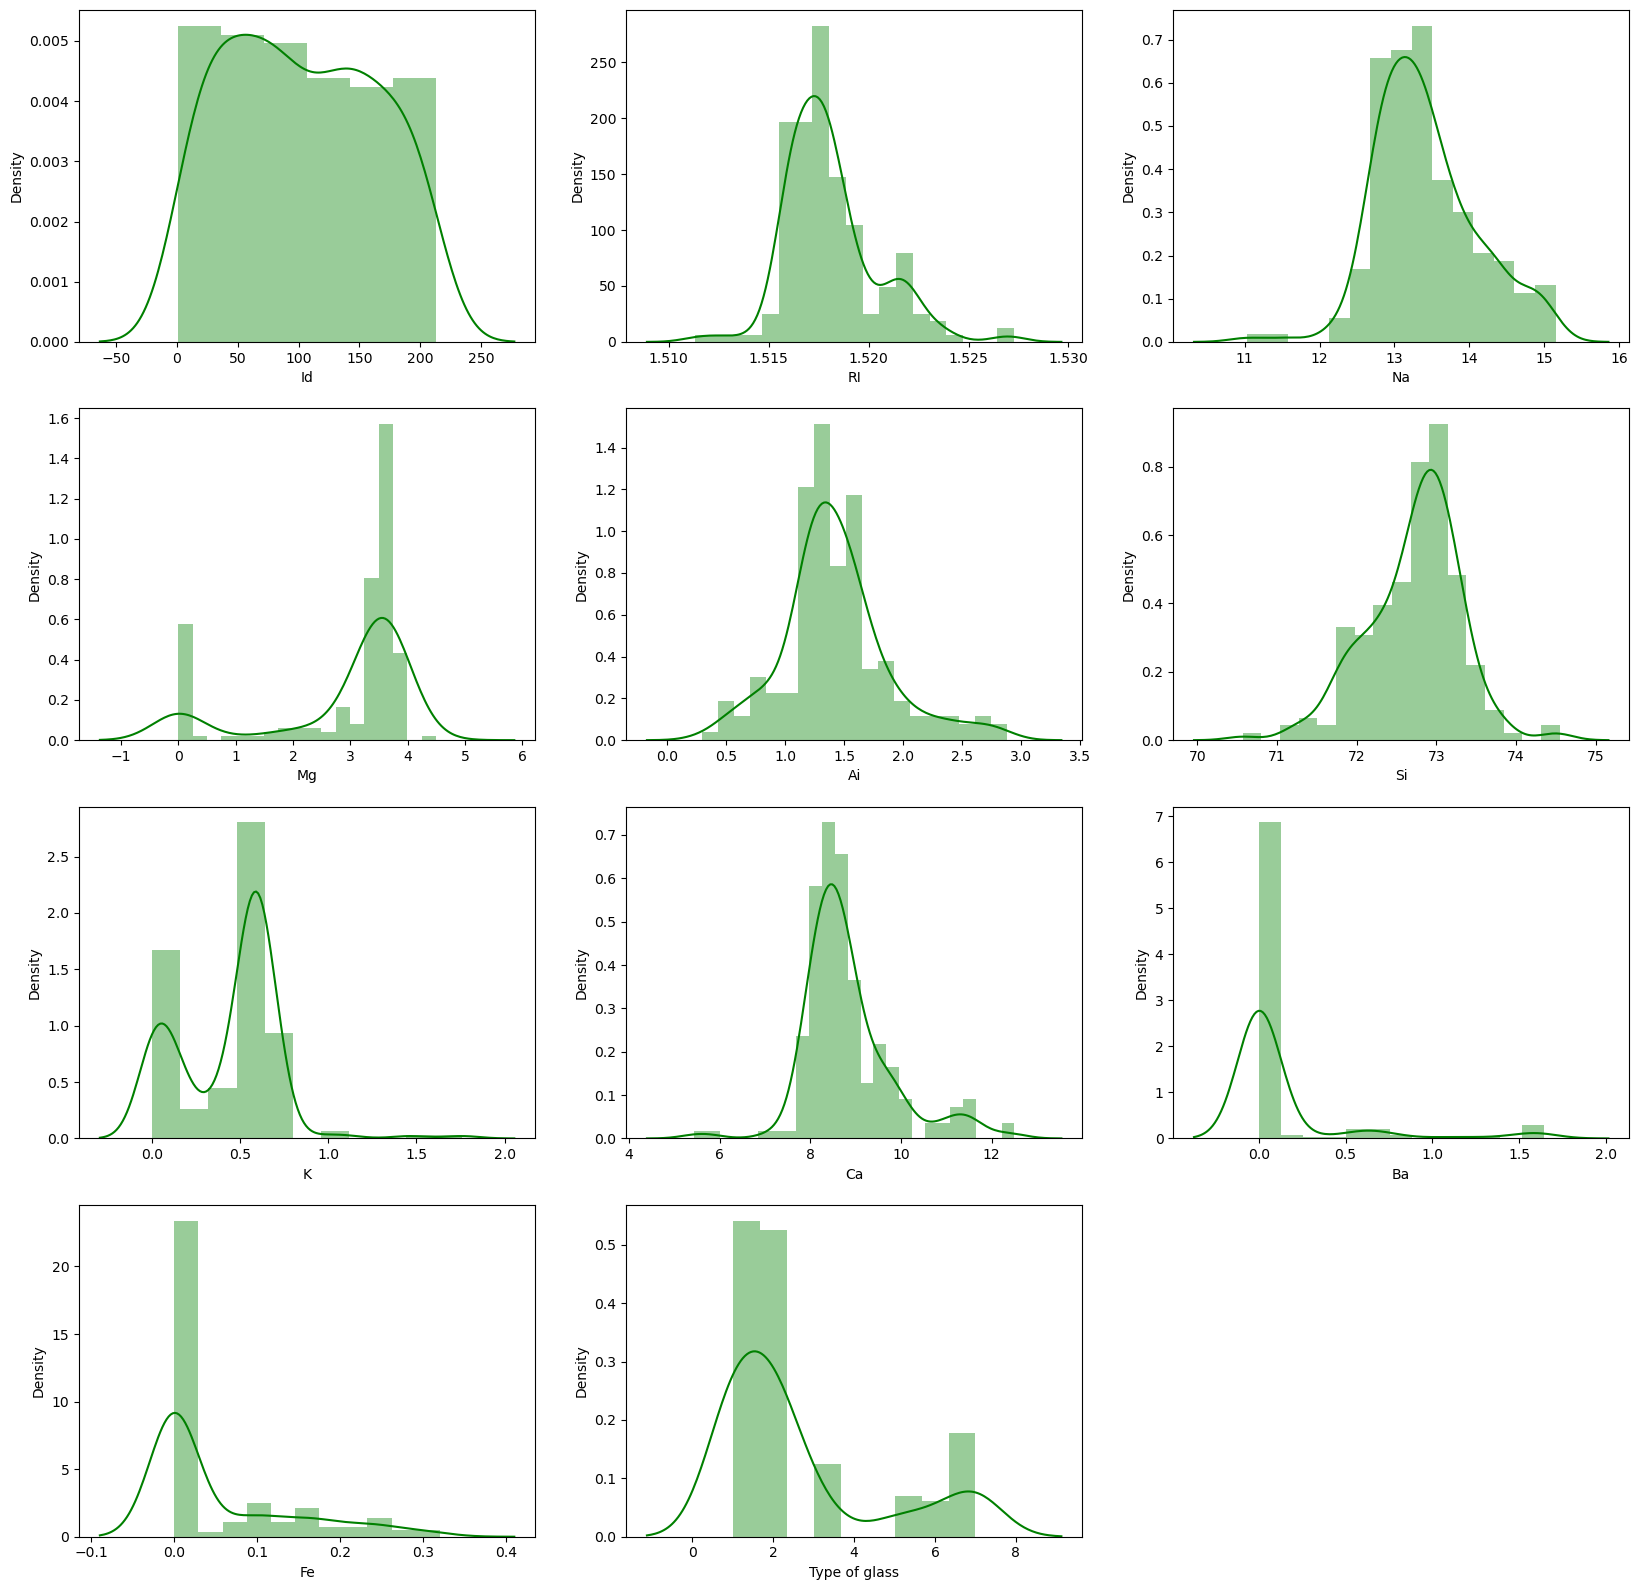

In [31]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(5,3,p)
        sns.distplot(df[i],color='g')
        plt.xlabel(i,fontsize=10)
    p+=1
plt.show()

Here we can see there is skewness present in some column.

In [32]:
#Removing Skewness
df.skew()

Id               0.107537
RI               0.952733
Na               0.371482
Mg              -1.528849
Ai               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.284007
dtype: float64

In [33]:
df['Mg']=np.cbrt(df['Mg'])
df['Ba']=np.cbrt(df['Ba'])
df['Fe']=np.cbrt(df['Fe'])

In [34]:
#Checking skewness
df.skew()

Id               0.107537
RI               0.952733
Na               0.371482
Mg              -1.899050
Ai               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               2.207594
Fe               0.883166
Type of glass    1.284007
dtype: float64

Now we can see the skewness is removed.

# Correlation

In [35]:
cor=df.corr()
cor

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
Id,1.000000,-0.100672,0.412167,-0.631654,0.530711,0.150453,-0.301012,0.193161,0.538980,-0.095317,0.872504
RI,-0.100672,1.000000,0.050760,0.063399,-0.522197,-0.609011,-0.368238,0.690650,-0.226018,0.016214,-0.167355
Na,0.412167,0.050760,1.000000,-0.526123,0.253127,-0.234718,-0.612183,0.019987,0.547500,-0.160878,0.533025
Mg,-0.631654,0.063399,-0.526123,1.000000,-0.580115,-0.362193,0.494707,-0.400040,-0.651379,0.110677,-0.782430
Ai,0.530711,-0.522197,0.253127,-0.580115,1.000000,0.335262,0.005827,-0.213304,0.599309,-0.083982,0.660262
Si,0.150453,-0.609011,-0.234718,-0.362193,0.335262,1.000000,0.072579,-0.165712,0.183301,0.002445,0.262152
K,-0.301012,-0.368238,-0.612183,0.494707,0.005827,0.072579,1.000000,-0.500579,-0.294253,0.052307,-0.383499
Ca,0.193161,0.690650,0.019987,-0.400040,-0.213304,-0.165712,-0.500579,1.000000,-0.140398,0.003847,0.154762
Ba,0.538980,-0.226018,0.547500,-0.651379,0.599309,0.183301,-0.294253,-0.140398,1.000000,-0.034743,0.701027
Fe,-0.095317,0.016214,-0.160878,0.110677,-0.083982,0.002445,0.052307,0.003847,-0.034743,1.000000,-0.182102


<AxesSubplot:>

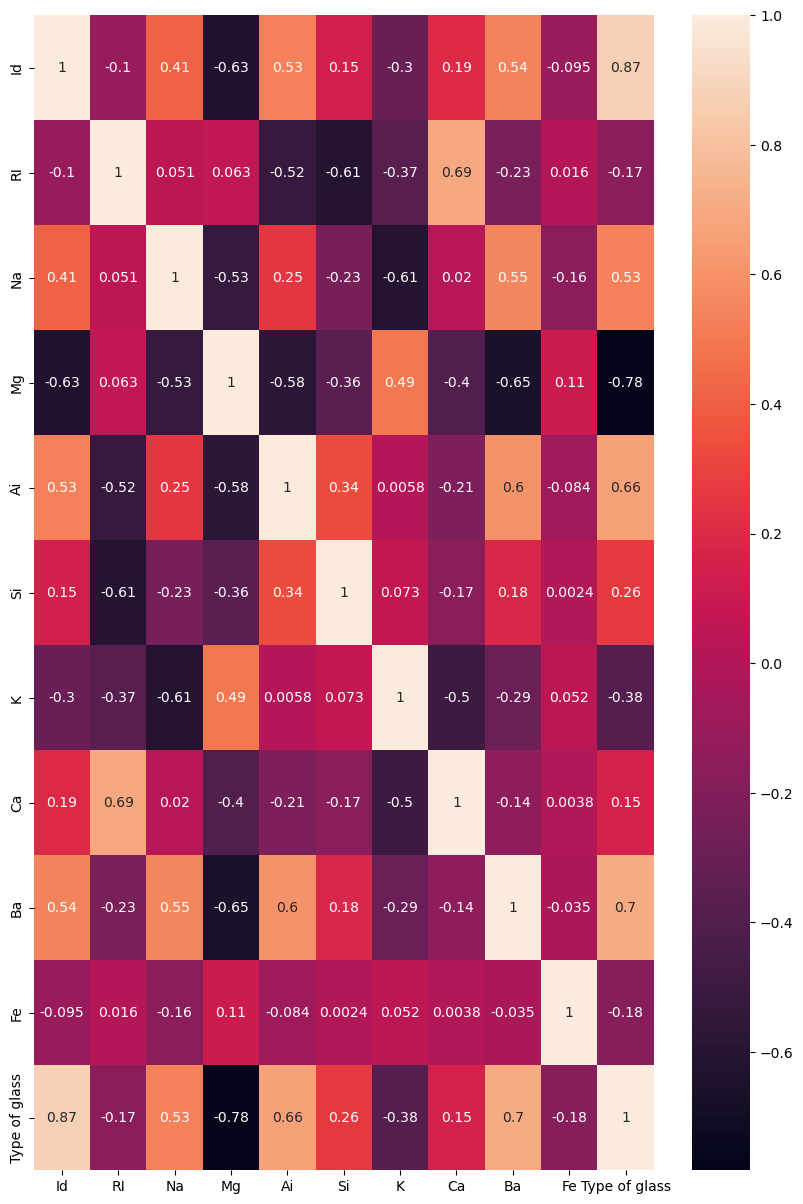

In [36]:
plt.figure (figsize=(10,15))
sns.heatmap(cor,annot=True)

In [37]:
cor['Type of glass'].sort_values(ascending=False)

Type of glass    1.000000
Id               0.872504
Ba               0.701027
Ai               0.660262
Na               0.533025
Si               0.262152
Ca               0.154762
RI              -0.167355
Fe              -0.182102
K               -0.383499
Mg              -0.782430
Name: Type of glass, dtype: float64

In [38]:
#Separating feature and target variable
x=df.iloc[:,0:-1]
x

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,1.649740,1.10,71.78,0.06,8.75,0.000000,0.0
1,2,1.51761,13.89,1.532619,1.36,72.73,0.48,7.83,0.000000,0.0
2,3,1.51618,13.53,1.525490,1.54,72.99,0.39,7.78,0.000000,0.0
3,4,1.51766,13.21,1.545286,1.29,72.61,0.57,8.22,0.000000,0.0
4,5,1.51742,13.27,1.535452,1.24,73.08,0.55,8.07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.000000,2.74,72.85,0.00,9.45,0.814325,0.0
209,210,1.51623,14.14,0.000000,2.88,72.61,0.08,9.18,1.019613,0.0
210,211,1.51685,14.92,0.000000,1.99,73.06,0.00,8.40,1.167165,0.0
211,212,1.52065,14.36,0.000000,2.02,73.42,0.00,8.44,1.179274,0.0


In [39]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 194, dtype: int64

In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
xf=st.fit_transform(x)
x=pd.DataFrame(data=xf,columns=x.columns)
x

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,-1.649313,1.291781,0.332127,0.700169,-0.729105,-1.612464,-1.319609,-0.075653,-0.415308,-0.67803
1,-1.633019,-0.197832,0.704398,0.481196,-0.141722,0.016082,0.172091,-1.008147,-0.415308,-0.67803
2,-1.616725,-0.824346,0.168328,0.467868,0.264928,0.461790,-0.147559,-1.058826,-0.415308,-0.67803
3,-1.600431,-0.175926,-0.308179,0.504878,-0.299864,-0.189629,0.491741,-0.612851,-0.415308,-0.67803
4,-1.584137,-0.281075,-0.218834,0.486492,-0.412822,0.616073,0.420708,-0.764888,-0.415308,-0.67803
...,...,...,...,...,...,...,...,...,...,...
189,1.739854,-0.727959,1.419158,-2.384242,2.975928,0.221793,-1.532708,0.633854,2.070338,-0.67803
190,1.756148,-0.802440,1.076668,-2.384242,3.292211,-0.189629,-1.248575,0.360187,2.696958,-0.67803
191,1.772442,-0.530805,2.238153,-2.384242,1.281553,0.581788,-1.532708,-0.430406,3.147347,-0.67803
192,1.788737,1.134057,1.404267,-2.384242,1.349328,1.198921,-1.532708,-0.389863,3.184306,-0.67803


In [41]:
#Checking Multi-Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.970809,Id
1,5.236247,RI
2,7.473243,Na
3,15.262475,Mg
4,3.808699,Ai
5,5.593847,Si
6,3.644600,K
7,10.243818,Ca
8,3.727066,Ba
9,1.053871,Fe


We can see from the table there is multi-collinearity present in the dataset.

In [42]:
#Removing Multi-collineraity
df.drop(['Mg'],axis=1,inplace=True)
df

,Id,RI,Na,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,1.10,71.78,0.06,8.75,0.000000,0.0,1
1,2,1.51761,13.89,1.36,72.73,0.48,7.83,0.000000,0.0,1
2,3,1.51618,13.53,1.54,72.99,0.39,7.78,0.000000,0.0,1
3,4,1.51766,13.21,1.29,72.61,0.57,8.22,0.000000,0.0,1
4,5,1.51742,13.27,1.24,73.08,0.55,8.07,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,2.74,72.85,0.00,9.45,0.814325,0.0,7
209,210,1.51623,14.14,2.88,72.61,0.08,9.18,1.019613,0.0,7
210,211,1.51685,14.92,1.99,73.06,0.00,8.40,1.167165,0.0,7
211,212,1.52065,14.36,2.02,73.42,0.00,8.44,1.179274,0.0,7


In [43]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
#finding the best random_state
max_RS=0
max_accu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>max_accu:
        max_accu=accuracy
        max_RS=i
print("The accuracy is",max_accu,"at random state",max_RS)

The accuracy is 1.0 at random state 4


# Modelling

In [45]:
#splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_RS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 10)
(59, 10)
(135,)
(59,)


In [46]:
#importing the necessary algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,dtc_pred))
print("Classification Report\n",classification_report(y_test,dtc_pred))

Accuracy Score = 1.0
Confusion Matrix
 [[19  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0 11]]
Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        11

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [48]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,knn_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,knn_pred))
print("Classification Report\n",classification_report(y_test,knn_pred))

Accuracy Score = 0.7627118644067796
Confusion Matrix
 [[19  0  0  0  0  0]
 [ 3 14  1  1  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0 10]]
Classification Report
               precision    recall  f1-score   support

           1       0.83      1.00      0.90        19
           2       0.64      0.74      0.68        19
           3       0.00      0.00      0.00         6
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       1.00      0.91      0.95        11

    accuracy                           0.76        59
   macro avg       0.66      0.61      0.62        59
weighted avg       0.71      0.76      0.73        59



In [49]:
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,sv_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,sv_pred))
print("Classification Report\n",classification_report(y_test,sv_pred))

Accuracy Score = 0.847457627118644
Confusion Matrix
 [[19  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0 10]]
Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.68      1.00      0.81        19
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.91      0.95        11

    accuracy                           0.85        59
   macro avg       0.78      0.65      0.68        59
weighted avg       0.79      0.85      0.81        59



# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
#finding the best k-fold
for i in range(2,15):
    cvscore=cross_val_score(dtc,x,y,cv=i)
    print('At K-Fold',i)
    print('CV Score of model is',cvscore.mean())
    print('std is',cvscore.std())
    print('Testing Accuracy Score for model is',accuracy_score(y_test,dtc_pred))
    print('\n')

At K-Fold 2
CV Score of model is 0.6391752577319587
std is 0.0824742268041237
Testing Accuracy Score for model is 1.0


At K-Fold 3
CV Score of model is 0.7929487179487179
std is 0.15556993687630516
Testing Accuracy Score for model is 1.0


At K-Fold 4
CV Score of model is 0.8501275510204082
std is 0.15903903971895453
Testing Accuracy Score for model is 1.0


At K-Fold 5
CV Score of model is 0.8751686909581646
std is 0.15406145410297362
Testing Accuracy Score for model is 1.0


At K-Fold 6
CV Score of model is 0.9023042929292929
std is 0.14122492033082987
Testing Accuracy Score for model is 1.0


At K-Fold 7
CV Score of model is 0.9113756613756614
std is 0.1437727857578832
Testing Accuracy Score for model is 1.0


At K-Fold 8
CV Score of model is 0.928125
std is 0.13195495206698382
Testing Accuracy Score for model is 1.0


At K-Fold 9
CV Score of model is 0.9377104377104377
std is 0.11918430990187111
Testing Accuracy Score for model is 1.0


At K-Fold 10
CV Score of model is 0.94868421

We can see the best cv score is achieved at k-fold 14, so we will proceed with this value

In [60]:
dtc_score=cross_val_score(dtc,x,y,cv=14)
print(dtc_score)
print(dtc_score.mean())
print("The difference between accuracy and cv is:",(accuracy_score(y_test,dtc_pred))-dtc_score.mean())

[0.78571429 1.         0.92857143 1.         1.         1.
 1.         1.         0.92857143 1.         1.         1.
 1.         0.76923077]
0.9580062794348508
The difference between accuracy and cv is: 0.04199372056514916


In [61]:
knn_score=cross_val_score(knn,x,y,cv=14)
print(knn_score)
print(knn_score.mean())
print("The difference between accuracy and cv is:",(accuracy_score(y_test,knn_pred))-knn_score.mean())

[0.85714286 0.92857143 0.85714286 0.85714286 0.92857143 0.85714286
 0.78571429 0.92857143 0.92857143 1.         0.57142857 0.92857143
 0.84615385 0.76923077]
0.8602825745682889
The difference between accuracy and cv is: -0.09757071016150931


In [62]:
sv_score=cross_val_score(sv,x,y,cv=14)
print(sv_score)
print(sv_score.mean())
print("The difference between accuracy and cv is:",(accuracy_score(y_test,sv_pred))-sv_score.mean())

[0.85714286 0.85714286 0.85714286 0.92857143 0.85714286 1.
 0.78571429 0.85714286 0.85714286 0.92857143 0.85714286 0.92857143
 0.76923077 0.76923077]
0.8649921507064365
The difference between accuracy and cv is: -0.017534523587792505


Here we can see the model DecisionTreeClassifier(dtc) is giving the best value so lets proceed with this model.

# Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
model=dtc
parameters={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID",grid)
print("SCORE :",grid.best_score_)
print(grid.best_params_)

GRID GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})
SCORE : 0.9067476383265858
{'criterion': 'entropy', 'splitter': 'random'}


In [59]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,pred))

Accuracy Score = 1.0


In [65]:
final_model=dtc
final_model

DecisionTreeClassifier(criterion='entropy')

# ROC AUC

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [77]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_pred_prob,y_test)

In [86]:
roc_auc=metrics.auc(fpr,tpr)

In [89]:
auc_score=roc_auc_score(y_pred_prob,y_test)
print("AUC Score:","\n",auc_score)

AUC Score: 
 0.475


# Saving the model

In [90]:
import joblib
joblib.dump(final_model,"Glass Identification.pkl")

['Glass Identification.pkl']

In [92]:
#predicting the saved model
model=joblib.load("Glass Identification.pkl")
prediction=model.predict(x_test)
prediction

array([1, 3, 1, 7, 1, 1, 3, 7, 1, 7, 7, 3, 2, 1, 2, 7, 2, 7, 2, 7, 2, 2,
       5, 1, 2, 2, 1, 1, 2, 7, 1, 5, 7, 6, 6, 2, 2, 2, 2, 1, 2, 7, 2, 2,
       1, 1, 2, 1, 7, 2, 2, 1, 1, 1, 3, 3, 1, 3, 1], dtype=int64)

In [93]:
actual=np.array(y_test)
ds=pd.DataFrame({"Predicted Value":prediction,"Actual Value":actual})
ds

,Predicted Value,Actual Value
0,1,1
1,3,3
2,1,1
3,7,7
4,1,1
5,1,1
6,3,3
7,7,7
8,1,1
9,7,7
